<a href="https://colab.research.google.com/github/Castolus/My-Data-Science-Portfolio/blob/main/Regression_HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FINAL PROJECT FOR MODULE 1**#
Aim of the project:

The aim of this project is to be able to perform an exploratory analysis of a dataset, and to perform a regression model to predict house prices.

#1. DATA UPLOAD #

In [62]:
# Import the file locally
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


#2. EXPLORATORY PHASE / PRE-PROCESSING

We analyse the characteristics of the Dataset in order to draw conclusions beforehand.

##2.1. DATASET SCANNING 

This section discusses the general characteristics of the dataset, in order to understand how it is composed.

In [63]:
import pandas as pd
import numpy as np
house_data = pd.read_csv('data.csv') #Create varaible with dataset
house_data #Explore Dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [64]:
house_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [65]:
house_data.shape

(4600, 18)

In [66]:
house_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [67]:
# Ask variable rate
house_data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [68]:
#house_data['price']=house_data['price'].apply(np.int64)

In [69]:
house_data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [70]:
# Fill null values with the mean
house_data.fillna(house_data.mean())

# Fill in null values with the most frequent value
house_data['bedrooms'] = house_data['bedrooms'].fillna(house_data['bedrooms'].mode()[0])

In [71]:
# Query numerical variables of the dataset
house_data.describe(include=np.number)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [72]:
# Query numerical variables of the dataset
house_data.describe(include=object)

,date,street,city,statezip,country
count,4600,4600,4600,4600,4600
unique,70,4525,44,77,1
top,2014-06-23 00:00:00,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,4,1573,148,4600


In [73]:
# Eliminate the variable "date" because it is not relevant.
house_data.drop(columns='date',inplace=True)

# Identify numerical variables and categorical variables
num_var=house_data.select_dtypes(include=np.number).columns.to_list()
cat_var=house_data.select_dtypes(include=object).columns.to_list()


In [74]:
num_var

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

In [75]:
cat_var

['street', 'city', 'statezip', 'country']

## 2.2 Visual analysis of data

We visualise the different variables of the Dataset by means of graphs.
 

In [76]:
# Import visualisation libraries 
import matplotlib.pyplot as plp
import seaborn as sns

# Make a copy of the dataset to keep the original one
house_data1=house_data

house_data1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


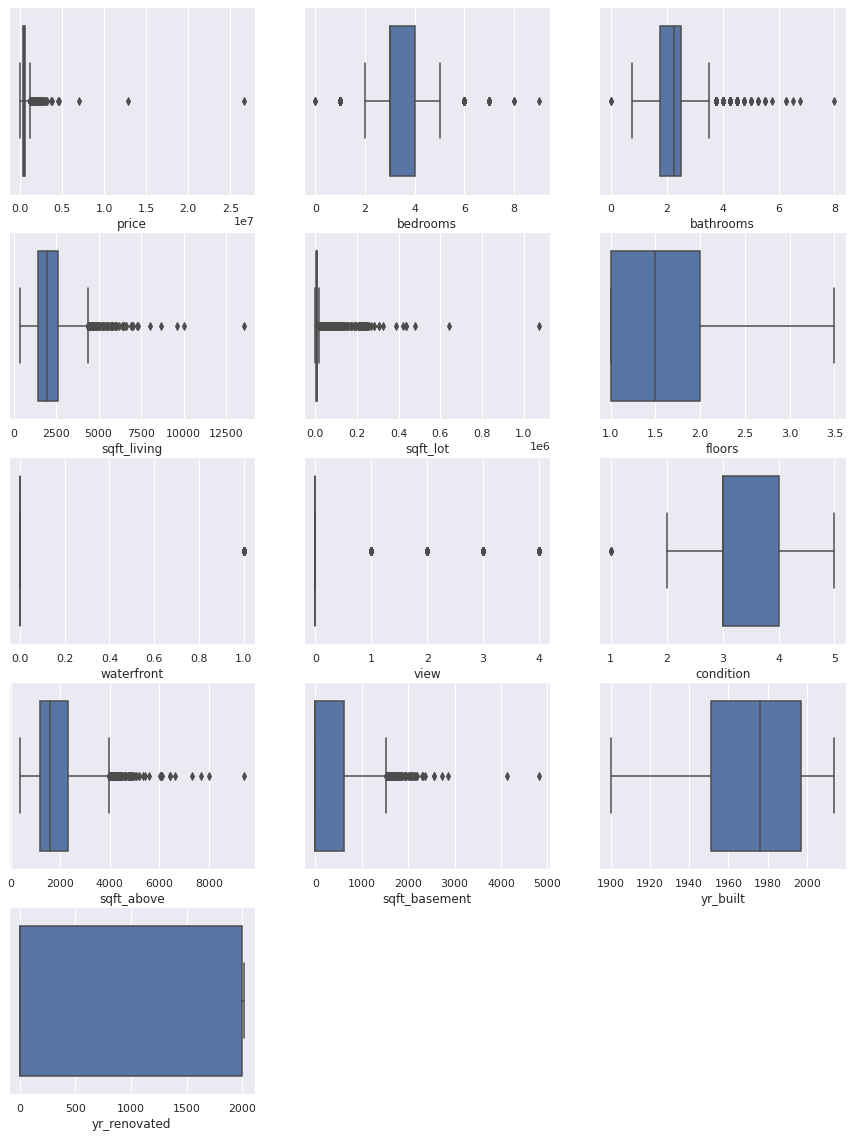

In [77]:
# Analyze the distribution of each variable
i=1
plp.figure(figsize=(15,20))
for j in num_var:
    plp.subplot(5,3,i)
    sns.boxplot(data=house_data1,x=j)
    i+=1

In [78]:
# Outlier elimination
def outlier_tret(x):
    upper=x.quantile(0.98)
    lower=x.quantile(0.2)
    x=np.where(x>upper,upper,x)
    x=np.where(x<lower,lower,x)
    return x

In [79]:
house_data1[num_var]=house_data1[num_var].apply(lambda x: outlier_tret(x))


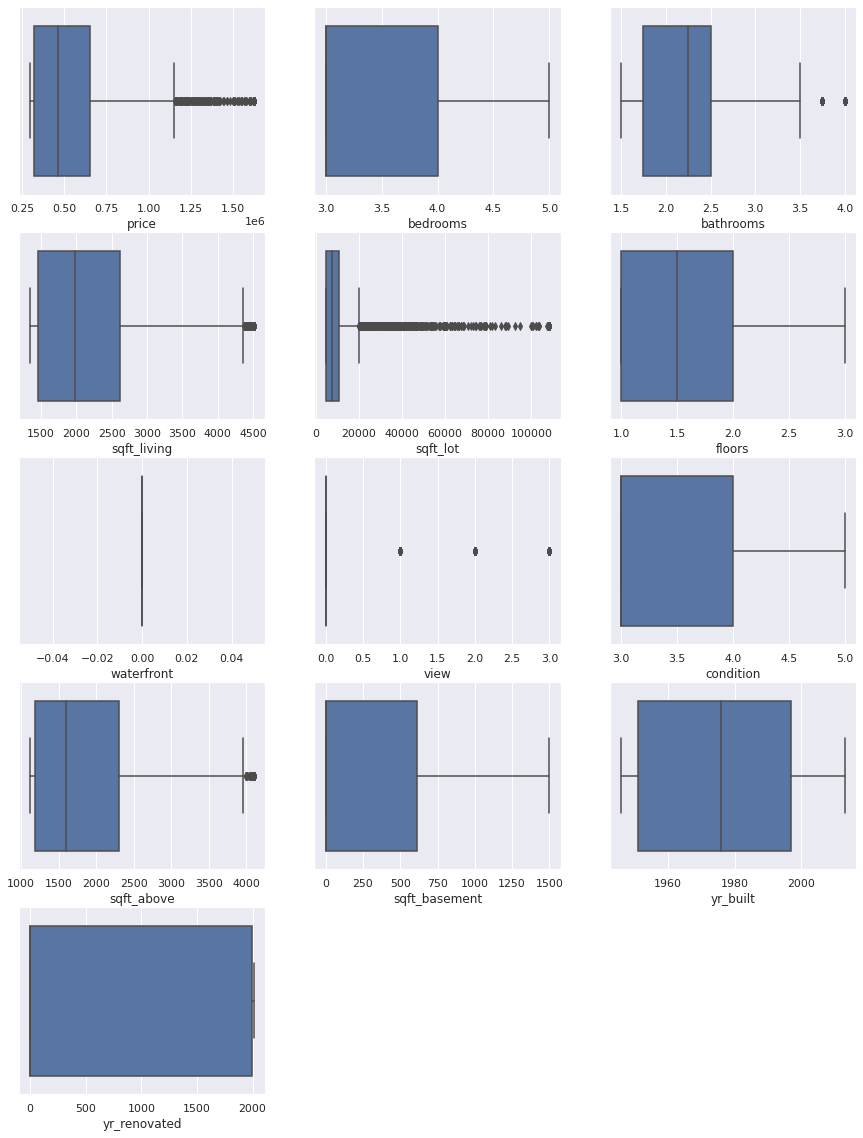

In [80]:
# Re-analyze the distribution of each variable after Outlier elimination.
i=1
plp.figure(figsize=(15,20))
for j in num_var:
    plp.subplot(5,3,i)
    sns.boxplot(data=house_data1,x=j)
    i+=1

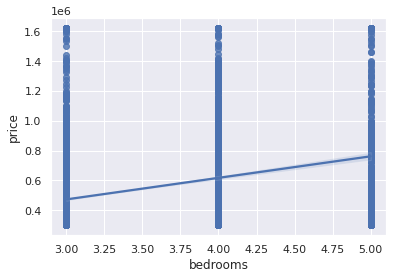

In [81]:
# Regplot visualisation
sns.set(style="darkgrid")
sns.regplot(x=house_data1['bedrooms'], y= house_data1["price"])
plp.show()

With the exception of 2 cases to be analysed, the highest prices are found in 4 and 5-bedroom properties, although they then fall again. That is to say, up to a maximum of 5 bedrooms, it could be said that the value of the property rises. 

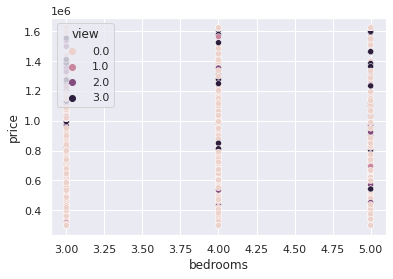

In [82]:
# Regplot visualisation
sns.set(style="darkgrid")
sns.scatterplot(x=house_data1['bedrooms'], y= house_data1["price"], hue=house_data1['view'])
plp.show()

If we plot according to the variable "View" we obtain a graph very similar to the previous one.

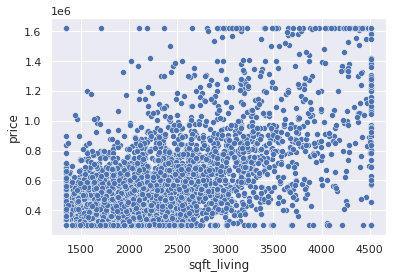

In [83]:
# Regplot visualisation
sns.set(style="darkgrid")
sns.scatterplot(x=house_data1['sqft_living'], y= house_data1["price"])
plp.show()

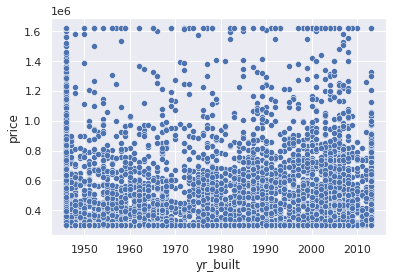

In [84]:
# Regplot visualisation
sns.set(style="darkgrid")
sns.scatterplot(x=house_data1['yr_built'], y= house_data1["price"])
plp.show()

The year of construction does not seem to be relevant for the price of the property either.

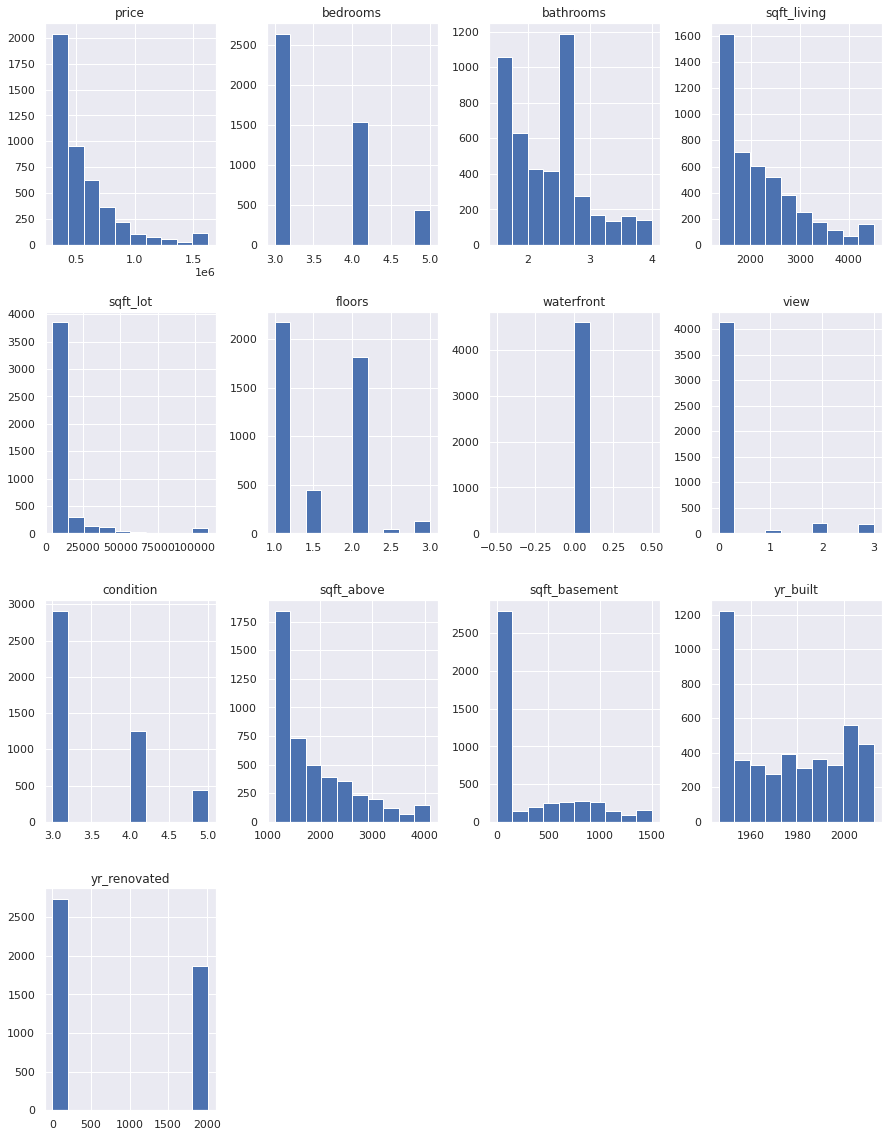

In [85]:
# Histogram display
house_data1.hist(figsize=(15,20))
plp.show()

In [86]:
# The variable "waterfront" always has the same value, so we remove it from the dataset.
house_data1=house_data1.drop(columns='waterfront')

In [87]:
# Analysis of the different values of categorical variables
house_data1[cat_var].nunique()

street      4525
city          44
statezip      77
country        1
dtype: int64

In [88]:
# We leave only the "city" variable
house_data1.drop(columns=['street','statezip','country'],inplace=True)

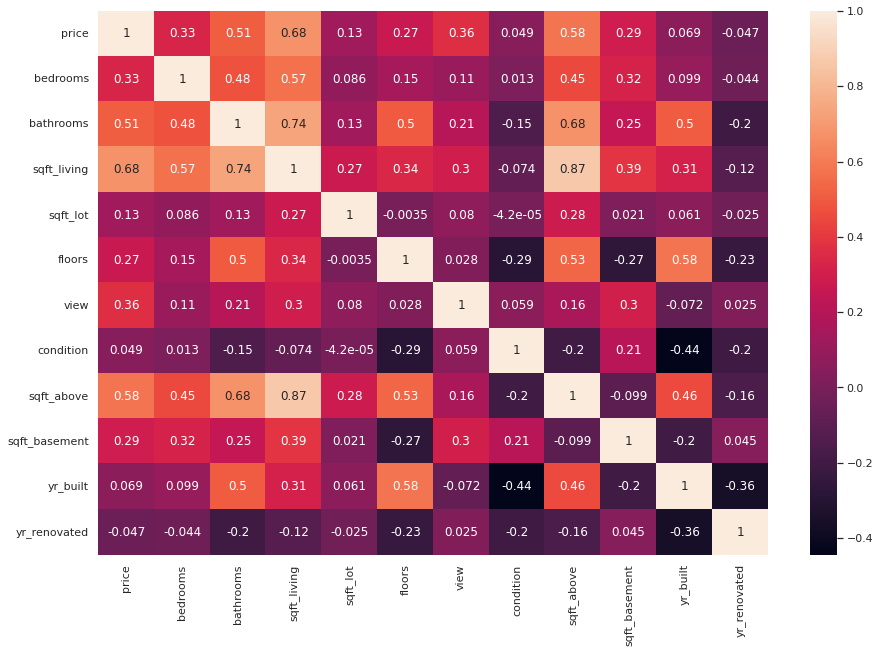

In [89]:
plp.figure(figsize=(15, 10))
correlacion = house_data1.corr()
sns.heatmap(correlacion, annot=True);

We observe a strong and obvious correlation between the square metres of the dwelling and the square metres of the upper floor of the house. As well as between the number of bathrooms and the square metres of the house and the upper floor. The larger the living area, the greater the number of bathrooms. Appart of this obvious correlations, there aren´t more strong correlations to mention.


In [90]:
# We order the correlation of variables, with respect to price.
corr=house_data1.corr()["price"].sort_values(ascending=False)

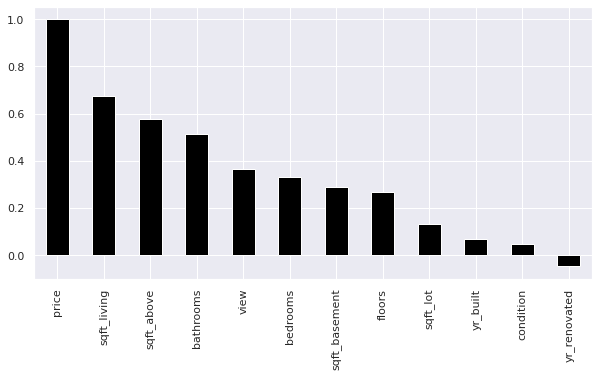

In [91]:
# Visualization of the relationship of the numerical variables with the "price" variable.
plp.figure(figsize=(10,5))
corr.plot(kind='bar',color='black');

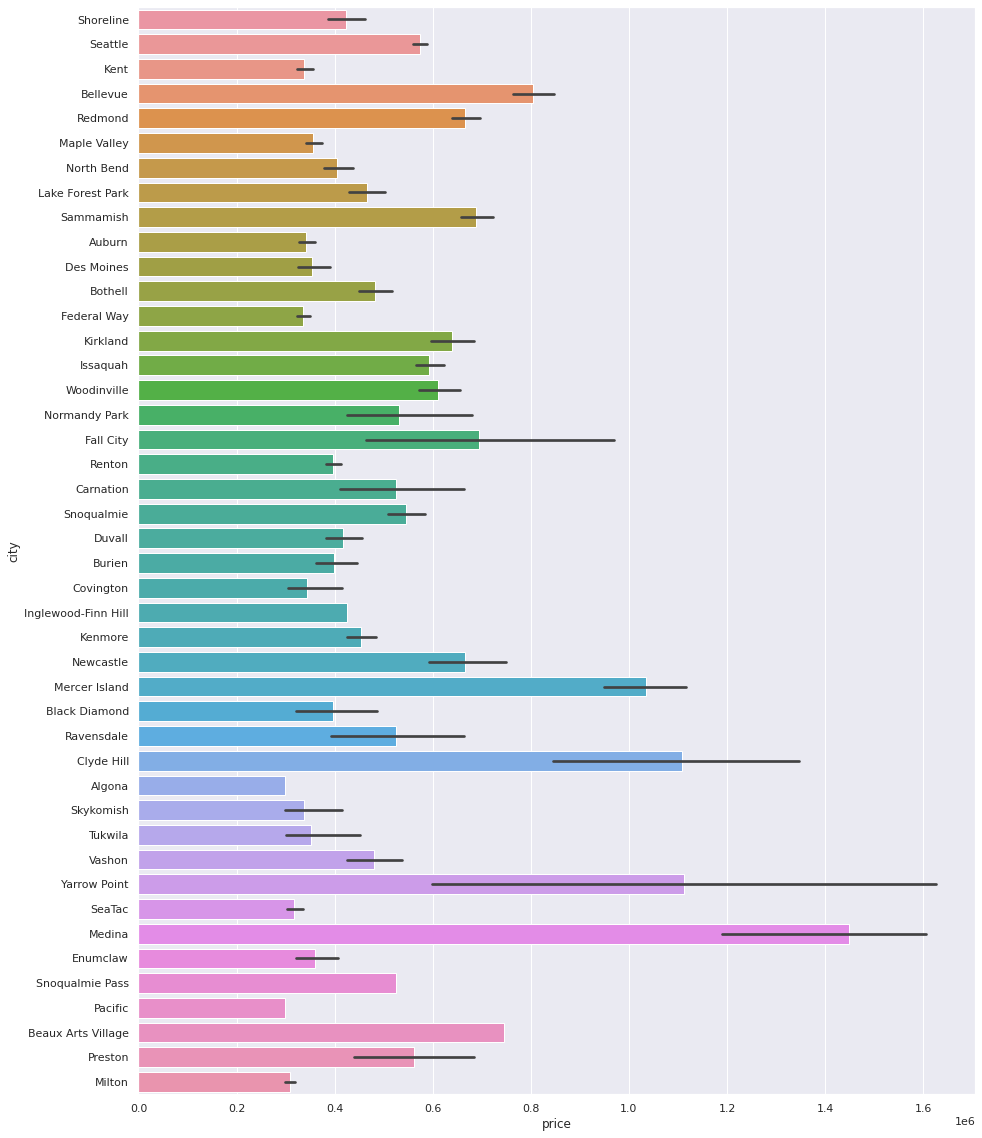

In [92]:
# Visualization of the relationship between the categorical variable "city" and the variable "price".
plp.figure(figsize=(15,20))
sns.barplot(data=house_data1,y='city',x='price',orient="h3");

# PHASE 3: TRAINING AND VALIDATION PHASE

##HYPOTHESIS 1: Using only numerical variables 


During the exercise, we will run different models applying different data treatments to see how these affect the outcome on the metrics.
Since the models only accept numerical variables, we will eliminate all variables that are not numerical.

In [93]:
house_data_hip1=house_data1

x_hip1 = house_data_hip1.drop(columns=['city','price'],axis=1) # Independent variables
y_hip1 = house_data_hip1['price'] # Dependent variable

house_data_hip1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1350.0,7912.0,1.5,0.0,3.0,1340.0,0.0,1955.0,2005.0,Shoreline
1,1625200.0,5.0,2.50,3650.0,9050.0,2.0,3.0,5.0,3370.0,280.0,1946.0,0.0,Seattle
2,342000.0,3.0,2.00,1930.0,11947.0,1.0,0.0,4.0,1930.0,0.0,1966.0,0.0,Kent
3,420000.0,3.0,2.25,2000.0,8030.0,1.0,0.0,4.0,1120.0,1000.0,1963.0,0.0,Bellevue
4,550000.0,4.0,2.50,1940.0,10500.0,1.0,0.0,4.0,1140.0,800.0,1976.0,1992.0,Redmond


In [94]:
# We scale the variables to make it more standard.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_hip1 = scaler.fit_transform(x_hip1)
#sklearn's preprocessing algorithms are prepared to convert matrices so we have to make a transformation of our variable y
# since it is a variable of type Series
# for this we do a .to_numpy() which converts the series into an array and then we do reshape (-1,1) which transforms an array of 1xn into an array of nx1.
y_hip1 = scaler.fit_transform(y_hip1.to_numpy().reshape(-1,1))
# Volvemos a transformar nuestra variable en un array de 1xn
y_hipot1=y_hip1.reshape(1,-1)[0]

### HYPOTHESIS 1a: Using a 70/30 dataset 


In [95]:
# We prepare the data for training and for validation.
from sklearn.model_selection import train_test_split 
x_h1_train_30 , x_h1_test_30, y_h1_train_30, y_h1_test_30 = train_test_split(x_hip1, y_hip1, test_size=0.3, random_state=43) #Se utiliza un conjunto de 30% para test

### HYPOTHESIS 1b: Using an 80/20 dataset 


In [96]:
# We prepare the data for training and for validation.
from sklearn.model_selection import train_test_split 
x_h1_train_20 , x_h1_test_20, y_h1_train_20, y_h1_test_20 = train_test_split(x_hip1, y_hip1, test_size=0.2, random_state=43) #Se utiliza un conjunto de 20% para test

I divide Hypothesis 1 into 2 sections: in the first one I use 70% of the data for training and 30% for the test. In the second I use 80% for training and 20% for the test.

I think it is better to have two different options to be able to draw more conclusions.

In [97]:
from sklearn.linear_model import LinearRegression 

#Create the Line Regressions we are going to use with 20% and 30%.
reg_lineal_20 = LinearRegression() 
reg_lineal_30 = LinearRegression()

reg_lineal_20.fit(x_h1_train_20, y_h1_train_20) # linear regression for 20% of test
reg_lineal_30.fit(x_h1_train_30, y_h1_train_30) # linear regression for 30% of test


LinearRegression()

In [98]:
from sklearn.metrics import mean_squared_error # Import metrics 

pred_train_20 = reg_lineal_20.predict(x_h1_train_20) # Predict values for training data (80% of training)
pred_train_30 = reg_lineal_30.predict(x_h1_train_30) # Predict values for training data (70% of training)

pred_test_20 = reg_lineal_20.predict(x_h1_test_20) # Predict values for validation data (20% validation)
pred_test_30 = reg_lineal_30.predict(x_h1_test_30) # Predict values for validation data (30% validation)


#Calculate the quadratic error for the predictions made.
mse_h1_train_20 = mean_squared_error(y_true = y_h1_train_20, y_pred = pred_train_20)
mse_h1_test_20 = mean_squared_error(y_true = y_h1_test_20, y_pred = pred_test_20)
mse_h1_train_30 = mean_squared_error(y_true = y_h1_train_30, y_pred = pred_train_30)
mse_h1_test_30 = mean_squared_error(y_true = y_h1_test_30, y_pred = pred_test_30)

# Show the results
print('Error cuadratico medio (MSE) Train (HIPO 1a: 0.2) = ' + str(mse_h1_train_20))
print('Error cuadratico medio (MSE) Train (HIPO 1b: 0.3) = ' + str(mse_h1_train_30))

print('Error cuadratico medio (MSE) Test  (HIPO 1a: 0.2) = ' + str(mse_h1_test_20))
print('Error cuadratico medio (MSE) Test  (HIPO 1b: 0.3) = ' + str(mse_h1_test_30))


Error cuadratico medio (MSE) Train (HIPO 1a: 0.2) = 0.46843232976113974
Error cuadratico medio (MSE) Train (HIPO 1b: 0.3) = 0.45954111222698973
Error cuadratico medio (MSE) Test  (HIPO 1a: 0.2) = 0.4573313755680979
Error cuadratico medio (MSE) Test  (HIPO 1b: 0.3) = 0.4818039095505246


It is observed that in the 80/20 model we have better results. We will use this model.

In [99]:
# VALIDATION PHASE

acc=reg_lineal_20.score(x_h1_train_20,y_h1_train_20)
print('Accuracy= '+str(acc))

Accuracy= 0.534809459268799


In [100]:
# Import the mean squared error (MSE) calculation
from sklearn.metrics import mean_squared_error

# Predict values and for the data used in training
pred_training = reg_lineal_20.predict(x_h1_train_20)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_h1_train_20 = mean_squared_error(y_true = y_h1_train_20, y_pred = pred_training)
print('Error Cuadrático Medio (MSE) HIPO 1 TRAIN= ' + str(mse_h1_train_20))

# predecimos los valores y para los datos usados en el entrenamiento
pred_training = reg_lineal_20.predict(x_h1_test_20)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_h1_test_20 = mean_squared_error(y_true = y_h1_test_20, y_pred = pred_training)
print('Error Cuadrático Medio (MSE) HIPO 1 TEST= ' + str(mse_h1_test_20))


Error Cuadrático Medio (MSE) HIPO 1 TRAIN= 0.46843232976113974
Error Cuadrático Medio (MSE) HIPO 1 TEST= 0.4573313755680979


The metrics obtained are not very good, so we decided to move forward with the second hypothesis.


##HYPOTHESIS 2: Transform the variables 'city' and 'statezip' into numeric variables.
Transform the String variables into INT variables.

In [101]:
# Prepare the dataset of hypothesis 2
house_data_hip2 = pd.get_dummies(data = house_data1, prefix = 'OHE', prefix_sep='_',
               columns = ['city'],
               drop_first =True,
               dtype='int8')

In [102]:
# Check First Lines of our dataSet
house_data_hip2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,OHE_Auburn,OHE_Beaux Arts Village,OHE_Bellevue,OHE_Black Diamond,OHE_Bothell,OHE_Burien,OHE_Carnation,OHE_Clyde Hill,OHE_Covington,OHE_Des Moines,OHE_Duvall,OHE_Enumclaw,OHE_Fall City,OHE_Federal Way,OHE_Inglewood-Finn Hill,OHE_Issaquah,OHE_Kenmore,OHE_Kent,OHE_Kirkland,OHE_Lake Forest Park,OHE_Maple Valley,OHE_Medina,OHE_Mercer Island,OHE_Milton,OHE_Newcastle,OHE_Normandy Park,OHE_North Bend,OHE_Pacific,OHE_Preston,OHE_Ravensdale,OHE_Redmond,OHE_Renton,OHE_Sammamish,OHE_SeaTac,OHE_Seattle,OHE_Shoreline,OHE_Skykomish,OHE_Snoqualmie,OHE_Snoqualmie Pass,OHE_Tukwila,OHE_Vashon,OHE_Woodinville,OHE_Yarrow Point
0,313000.0,3.0,1.50,1350.0,7912.0,1.5,0.0,3.0,1340.0,0.0,1955.0,2005.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1625200.0,5.0,2.50,3650.0,9050.0,2.0,3.0,5.0,3370.0,280.0,1946.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930.0,11947.0,1.0,0.0,4.0,1930.0,0.0,1966.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000.0,8030.0,1.0,0.0,4.0,1120.0,1000.0,1963.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940.0,10500.0,1.0,0.0,4.0,1140.0,800.0,1976.0,1992.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [103]:
x_hip2 = house_data_hip2.drop('price', axis=1)
y_hip2 = house_data_hip2['price']


In [104]:
# Scaling variables to make it more standardized
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_hip2 = scaler.fit_transform(x_hip2)
# Sklearn's preprocessing algorithms are prepared to convert matrices so we have to make a transformation of our variable y
# since it is a variable of type Series
# for this we do a .to_numpy() which converts the series into an array and then we do reshape (-1,1) which transforms an array of 1xn into an array of nx1.
y_hip2 = scaler.fit_transform(y_hip2.to_numpy().reshape(-1,1))
# Volvemos a transformar nuestra variable en un array de 1xn
y_hip2=y_hip2.reshape(1,-1)[0]

In [105]:
# Prepare the training and validation data
x_h2_train_20 , x_h2_test_20, y_h2_train_20, y_h2_test_20 = train_test_split(x_hip2, y_hip2, test_size=0.2, random_state=43)
reg_lineal_20 = LinearRegression() # Linear Regression

reg_lineal_20.fit(x_h2_train_20, y_h2_train_20)

LinearRegression()

In [106]:
# VALIDATION PHASE
acc2=reg_lineal_20.score(x_h2_train_20,y_h2_train_20)
print('Accuracy 1= '+str(acc))
print('Accuracy 2= '+str(acc2))

Accuracy 1= 0.534809459268799
Accuracy 2= 0.6633272464358296


In [107]:
# Predict values and for the data used in training
pred_training = reg_lineal_20.predict(x_h2_train_20)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_h2_train_20 = mean_squared_error(y_true = y_h2_train_20, y_pred = pred_training)
print('Error Cuadrático Medio (MSE) HIPO 1 TRAIN= ' + str(mse_h1_train_20))
print('Error Cuadrático Medio (MSE) HIPO 2 TRAIN= ' + str(mse_h2_train_20))

# predecimos los valores y para los datos usados en el entrenamiento
pred_training = reg_lineal_20.predict(x_h2_test_20)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_h2_test_20 = mean_squared_error(y_true = y_h2_test_20, y_pred = pred_training)
print('Error Cuadrático Medio (MSE) HIPO 1 TEST= ' + str(mse_h1_test_20))
print('Error Cuadrático Medio (MSE) HIPO 2 TEST= ' + str(mse_h2_test_20))


Error Cuadrático Medio (MSE) HIPO 1 TRAIN= 0.46843232976113974
Error Cuadrático Medio (MSE) HIPO 2 TRAIN= 0.33901893635083685
Error Cuadrático Medio (MSE) HIPO 1 TEST= 0.4573313755680979
Error Cuadrático Medio (MSE) HIPO 2 TEST= 0.3228335974452763


There is some improvement, but still not good values.


##HYPOTHESIS 3: Using MaxAbsScaler

In [108]:
house_data_hip3 = pd.get_dummies(data = house_data1, prefix = 'OHE', prefix_sep='_',
               columns = ['city'],
               drop_first =True,
               dtype='int8')

In [109]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
house_data_hip3[["price","sqft_living","sqft_above","sqft_basement",'sqft_lot','condition','yr_built','yr_renovated']] = scaler.fit_transform(house_data_hip3[["price","sqft_living","sqft_above","sqft_basement",'sqft_lot','condition','yr_built','yr_renovated']] )

In [110]:
x_hip3_20 = house_data_hip3.drop(columns=['price'],axis=1) 
y_hip3_20 = house_data_hip3['price'] #  variable depnediente

In [111]:
# preparamos train data y test data
x_hip3_train_20, x_hip3_test_20, y_hip3_train_20, y_hip3_test_20 = train_test_split(x_hip3_20, y_hip3_20, test_size=0.20, random_state=43)
#Regresion lineal
regresion_lineal=LinearRegression()
regresion_lineal.fit(x_hip3_train_20, y_hip3_train_20)

LinearRegression()

In [112]:
acc3=regresion_lineal.score(x_hip3_train_20,y_hip3_train_20)
print('Accuracy 1= '+str(acc))
print('Accuracy 2= '+str(acc2))
print('Accuracy 3= '+str(acc3))

Accuracy 1= 0.534809459268799
Accuracy 2= 0.6633272464358296
Accuracy 3= 0.6633272464358296


In [113]:
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hip3_train_20)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_h3_train_20 = mean_squared_error(y_true = y_hip3_train_20, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 TRAIN= ' + str(mse_h1_train_20))
print('Error Cuadrático Medio (MSE) HIPO 2 TRAIN= ' + str(mse_h2_train_20))
print('Error Cuadrático Medio (MSE) HIPO 3 TRAIN= ' + str(mse_h3_train_20))

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hip3_test_20)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_h3_test_20 = mean_squared_error(y_true = y_hip3_test_20, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 TEST= ' + str(mse_h1_test_20))
print('Error Cuadrático Medio (MSE) HIPO 2 TEST= ' + str(mse_h2_test_20))
print('Error Cuadrático Medio (MSE) HIPO 3 TEST= ' + str(mse_h3_test_20))

Error Cuadrático Medio (MSE) HIPO 1 TRAIN= 0.46843232976113974
Error Cuadrático Medio (MSE) HIPO 2 TRAIN= 0.33901893635083685
Error Cuadrático Medio (MSE) HIPO 3 TRAIN= 0.010800371399257548
Error Cuadrático Medio (MSE) HIPO 1 TEST= 0.4573313755680979
Error Cuadrático Medio (MSE) HIPO 2 TEST= 0.3228335974452763
Error Cuadrático Medio (MSE) HIPO 3 TEST= 0.010284743354156235


##HYPOTHESIS 4: Normalisation of the dependent (target) variable using the MinMaxScaler scaler
For this experiment, the MinMaxScaler will be used to determine how the model is affected by using another scaler.

In [114]:
from sklearn.preprocessing import MinMaxScaler # Import the scaler to be used: MinMaxScaler
scaler = MinMaxScaler() # Create the scaler

house_data_hip4 = pd.get_dummies(data = house_data1, prefix = 'OHE', prefix_sep='_',
               columns = ['city'],
               drop_first =True,
               dtype='int8')

house_data_hip4[['price']] = scaler.fit_transform(house_data_hip4[['price']])

x_hip4 = house_data_hip4.drop('price', axis=1)
y_hip4 = house_data_hip4['price']


In [115]:
# Prepare the data to be used
x_h4_train_20 , x_h4_test_20, y_h4_train_20, y_h4_test_20 = train_test_split(x_hip4, y_hip4, test_size=0.2, random_state=43)
reg_lineal_20 = LinearRegression()
reg_lineal_20.fit(x_h4_train_20, y_h4_train_20)

LinearRegression()

In [116]:
#Validation phase
pred_train_20 = reg_lineal_20.predict(x_h4_train_20) # Predict values for training data (80% of training)
pred_test_20 = reg_lineal_20.predict(x_h4_test_20) # Predict values for validation data (80% validation)

#Calculate the quadratic error for the predictions made.
mse_h4_train_20 = mean_squared_error(y_true = y_h4_train_20, y_pred = pred_train_20)
mse_h4_test_20 = mean_squared_error(y_true = y_h4_test_20, y_pred = pred_test_20)

# Presenting the results
print('Error cuadratico medio (MSE) Train (HIPO 1: 0.2) = ' + str(mse_h1_train_20))
print('Error cuadratico medio (MSE) Train (HIPO 2: 0.2) = ' + str(mse_h2_train_20))
print('Error cuadratico medio (MSE) Train (HIPO 3: 0.2) = ' + str(mse_h3_train_20))
print('Error cuadratico medio (MSE) Train (HIPO 4: 0.2) = ' + str(mse_h4_train_20))
print('')
print('Error cuadratico medio (MSE) Test  (HIPO 1: 0.2) = ' + str(mse_h1_test_20))
print('Error cuadratico medio (MSE) Test  (HIPO 2: 0.2) = ' + str(mse_h2_test_20))
print('Error cuadratico medio (MSE) Test  (HIPO 3: 0.2) = ' + str(mse_h3_test_20))
print('Error cuadratico medio (MSE) Test  (HIPO 4: 0.2) = ' + str(mse_h4_test_20))


Error cuadratico medio (MSE) Train (HIPO 1: 0.2) = 0.46843232976113974
Error cuadratico medio (MSE) Train (HIPO 2: 0.2) = 0.33901893635083685
Error cuadratico medio (MSE) Train (HIPO 3: 0.2) = 0.010800371399257548
Error cuadratico medio (MSE) Train (HIPO 4: 0.2) = 0.016189720194433644

Error cuadratico medio (MSE) Test  (HIPO 1: 0.2) = 0.4573313755680979
Error cuadratico medio (MSE) Test  (HIPO 2: 0.2) = 0.3228335974452763
Error cuadratico medio (MSE) Test  (HIPO 3: 0.2) = 0.010284743354156235
Error cuadratico medio (MSE) Test  (HIPO 4: 0.2) = 0.015416795499005702


According to the data obtained, no considerable differences were found between the use of the two scalers.
Even though, we observe a minimal deterioration of the result.


----------------------------------------------------------------------------------------

# PHASE 4: Evaluation and analysis of the results

Based on the results obtained, it can be seen that the best results are presented from Hypothesis 3, where we make use of the Scaler "maxAbsScaler".

The geographical location of housing is clearly a very important factor affecting house prices. We deleted te Variables "Statezip", "Street" and "Country" since they are irrelevant. I believe that "City" the only Geographical Variable usefull. 

Also, the variable Date is not relevant because, as can be seen in the Dataset, it does not vary in just one day and confuses the result of our Modell.

Apart from all that, the square metres of the house, year of renovation, number of rooms, views... are factors that also affect the price, although not as much as the geographical location of the property.

The Accuray of the first Training Test stays around 53%, while the Accuracy for the other 2 Hypothesis is around 66%. 

Nevertheless, it is after using a Scaler when I obteined good results both in Training and Test.
